## 快速构建一个简单的Dataset

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

In [2]:
# 创建数据集对象

class text_dataset(Dataset): #需要继承Dataset类

    def __init__(self, words, labels):
        self.words = words
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        label = self.labels[idx]
        word = self.words[idx]
        return word, label

In [3]:
words = ['Happy', 'Amazing', 'Sad', 'Unhapy', 'Glum']
labels = ['Positive', 'Positive', 'Negative', 'Negative', 'Negative']

dataset_words = text_dataset(words, labels)
dataset_words[0]

('Happy', 'Positive')

In [4]:
train_iter = DataLoader(dataset_words, batch_size=2)
X, y = next(iter(train_iter))
X, y

(('Happy', 'Amazing'), ('Positive', 'Positive'))

## 建立一个图片数据集

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
train_augs = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])
data_images = ImageFolder(root='../classify-leaves', transform=train_augs)

In [7]:
train_csv = pd.read_csv('../classify-leaves/train.csv')
print(len(train_csv))
train_csv

18353


,image,label
0,images/0.jpg,maclura_pomifera
1,images/1.jpg,maclura_pomifera
2,images/2.jpg,maclura_pomifera
3,images/3.jpg,maclura_pomifera
4,images/4.jpg,maclura_pomifera
...,...,...
18348,images/18348.jpg,aesculus_glabra
18349,images/18349.jpg,liquidambar_styraciflua
18350,images/18350.jpg,cedrus_libani
18351,images/18351.jpg,prunus_pensylvanica


In [8]:
# 获取某个元素的索引的方法
# 这个class_to_num可以存起来，之后可作为类别号到类别名称的映射
class_to_num = train_csv.label.unique()
print(np.where(class_to_num == 'quercus_montana')[0][0])

train_csv['class_num'] = train_csv['label'].apply(lambda x: np.where(class_to_num == x)[0][0])
train_csv

19


,image,label,class_num
0,images/0.jpg,maclura_pomifera,0
1,images/1.jpg,maclura_pomifera,0
2,images/2.jpg,maclura_pomifera,0
3,images/3.jpg,maclura_pomifera,0
4,images/4.jpg,maclura_pomifera,0
...,...,...,...
18348,images/18348.jpg,aesculus_glabra,107
18349,images/18349.jpg,liquidambar_styraciflua,75
18350,images/18350.jpg,cedrus_libani,133
18351,images/18351.jpg,prunus_pensylvanica,73


In [9]:
# 创建数据集对象 —— leaf
class leaf_dataset(Dataset): # 需要继承Dataset类
    def __init__(self, imgs, labels):
        self.imgs = imgs
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        label = self.labels[idx]
        data = self.imgs[idx][0] # 届时传入一个ImageFolder对象，需要取[0]获取数据，不要标签
        return data, label

In [10]:
imgs = data_images
labels = train_csv.class_num

In [11]:
Leaf_dataset = leaf_dataset(imgs=imgs, labels=labels)
train_iter = DataLoader(dataset=Leaf_dataset, batch_size=256, shuffle=True)
X, y = next(iter(train_iter))
X[0].shape, y[0]

(torch.Size([3, 224, 224]), tensor(10))

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

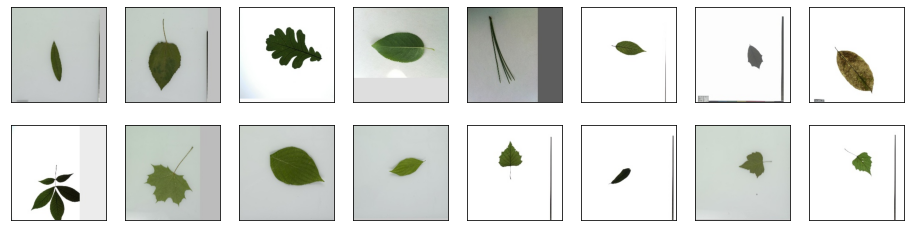

In [12]:
# 展示一下
toshow = [torch.transpose(X[i],0,2) for i in range(16)]

def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

show_images(toshow, 2, 8, scale=2)